In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#откроем файл с данными
df = pd.read_csv('/datasets/games.csv')

In [3]:
#изучим общую информацию
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000   

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Вывод

Открыв файл с данными и изучив общую информацию, я обнаружил пропуски в столбцах name, year_of_release, genre, critic_score, user_score и rating. Возможно, такое большое число пропусков вызвано ошибками в обработке и передаче данных: данные оценок критиков и пользователей наверняка берутся с сайтов-агрегаторов, вроде Metacritics. На мой взгляд, следует проверить исправен ли механизм, копирующий оценки с таких сайтов. Кроме того, возможна и ситуация, когда у игры просто недостаточно оценок для выставления итоговой. В таких случаях возможно как нахождение всяческих "заглушек", вроде "tbd" (to be determined) - "будет определено" - испольуемой самой платформой-агрегатором, так и просто появления ошибок-пропусков. Этот случай также следует изучить на предмет возможных путей улучшения механизмов обработки данных.

Пропуски в столбцах name, year_of_release и genre не составляют большого числа от всех данных, поэтому от них возможно будет избавиться простым удалением, в то время как пропуски в critic_score, user_score и rating многочисленны - удалять их нельзя, но и заполнять средним и медианой - опасно, так как эти данные понадобятся нам в дальнейшем для корреляционного анализа.

### Подготовка данных

In [4]:
#заменим названия столбцов (приведем к нижнему регистру)
df.columns = [col.lower() for col in df.columns]
#проверка
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#удалим строчки с пропусками в столбце name
df.dropna(subset = ['name'], inplace = True)
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
#удалим строчки с пропусками в столбце year of release
df.dropna(subset = ['year_of_release'], inplace = True)
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
#обработаем значения "tbd" в столбце user score
df.loc[df['user_score'] == 'tbd', 'user_score'] = None
#проверка
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', None, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
#преобразуем данные в нужные типы
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')
#проверка
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [9]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
#проверка
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6147,Rocket Power: Beach Bandits,GBA,2002,Platform,0.2,0.07,0.0,0.01,NaN,NaN,NaN,0.28


#### Вывод

Перейдя к этапу подготовки данных, я начал с изменения регистра в названиях столбцов.

Далее я избавился от пропусков в столбцах name и year_of_release простым удалением строк, содержащих пропуски. Как я уже указывал выше, таких строк совсем немного, поэтому такой способ обработки пропусков, на мой взгляд, не окажет существенного влияния на результат работы. 

Далее я обработал значения "tbd" в столбце user_score: как я писал выше, эта аббревиатура означает, что оценка не была выставлена, поэтому менять это значение на число или удалять было бы нелогично. Поэтому я заменил такие значения на значение "None", чтобы с данными в столбце можно было работать как числами.

Затем я преобразовал даные к нужным типам: столбец year_of_release - к целочисленному типу данных, а столбец user_score - к типу данных с плавающей запятой.

Наконец, я посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

## Исследовательский анализ данных

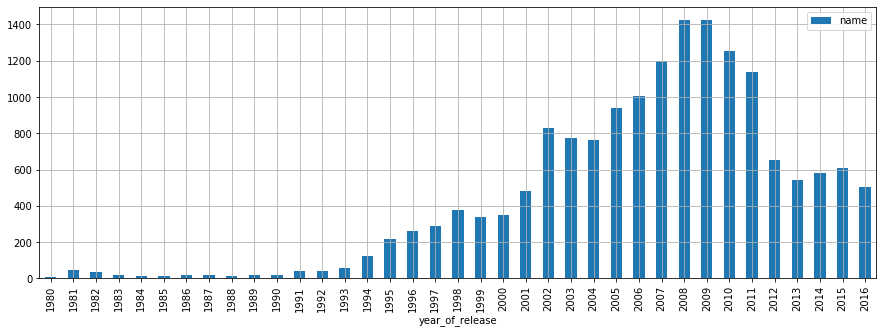

In [10]:
#посмотрим, сколько игр выпускалось в разные годы
plt.subplots(figsize=(15,5))
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', grid=True, ax=plt.subplot(111))

Взглянув на график выхода игр по годам, я обратил внимание, что до 1994-го года выходило очень мало игр (меньше ста в год), а после 1994-го индустрия игр на брала обороты. Можно сказать, что данные до 1994-го года не очень важны. Больше всего же игр выпускалось в 2008-м и 2009-м годах - более 1400.

Спад последних лет, вероятно, связан с мировым финансовым кризисом 2008-го года: небольшие команды разработчиков обанкротились, а большие издатели стали минимизировать риски и выпускать только проверенные франшизы. В промежутке с 2008-го по 2011-й спад не такой стремительный из-за игр, которые все же были выпущены, так как уже находились в производстве на момент кризиса.

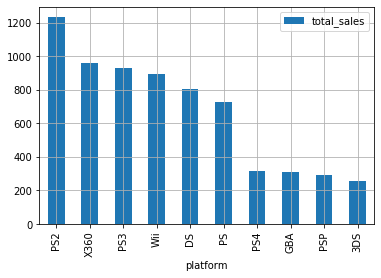

In [11]:
#выберем платформы с наибольшими суммарными продажами
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).plot(kind='bar', grid=True)

Шестью платформами с ниабольшими суммарными продажами являются PS2, X360, PS3, Wii, DS и PS.

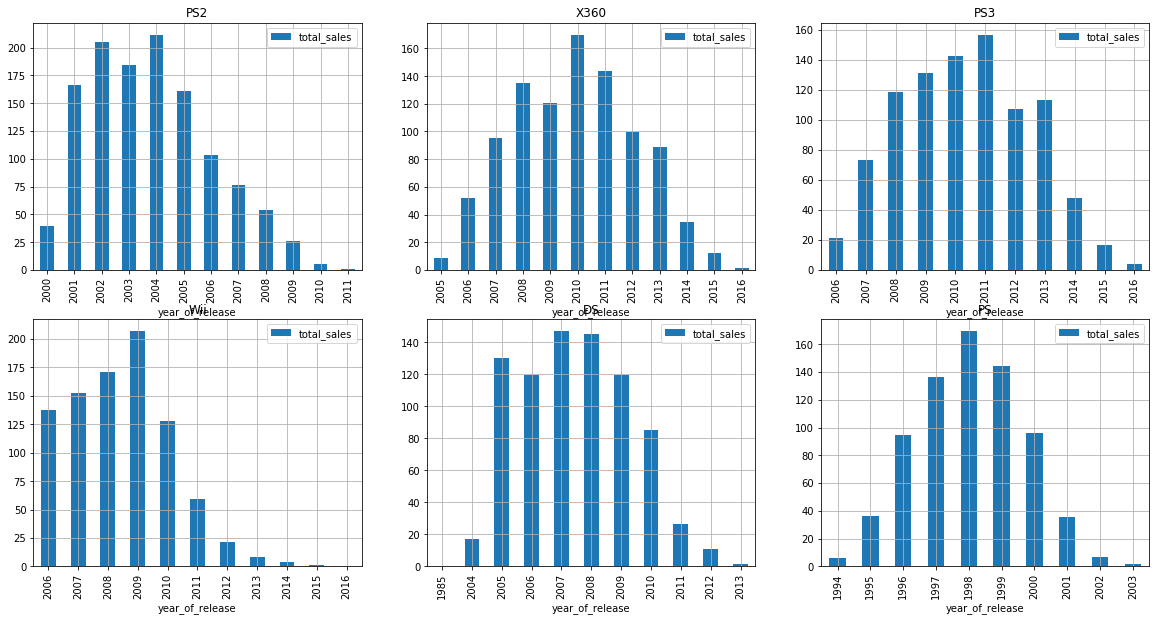

In [12]:
#построим распределение по годам продаж игр для шести платформ с наибольшими суммарными продажами
plt.subplots(figsize=(20,10))
position = 231
for element in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    df.query('platform == @element').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, ax=plt.subplot(position)).set_title(element)
    position += 1
plt.show()

Взглянув на графики распределения продаж по годам, можно сказать, что жизненный цикл платформы лежит в промежутке между восемью и десятью годами. Наибольшей "живучестью" могут похвастать PS2, Xbox 360 и PS3 - 10 лет. Тем не менее, актуальный период я принял равным пяти годам, так как, начиная с 2012-го года, количество выпускаемых игр перестало резко снижаться.

In [13]:
#возьмем данные за актуальный период
df_actual = df.query('year_of_release >= 2012')
#проверка
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


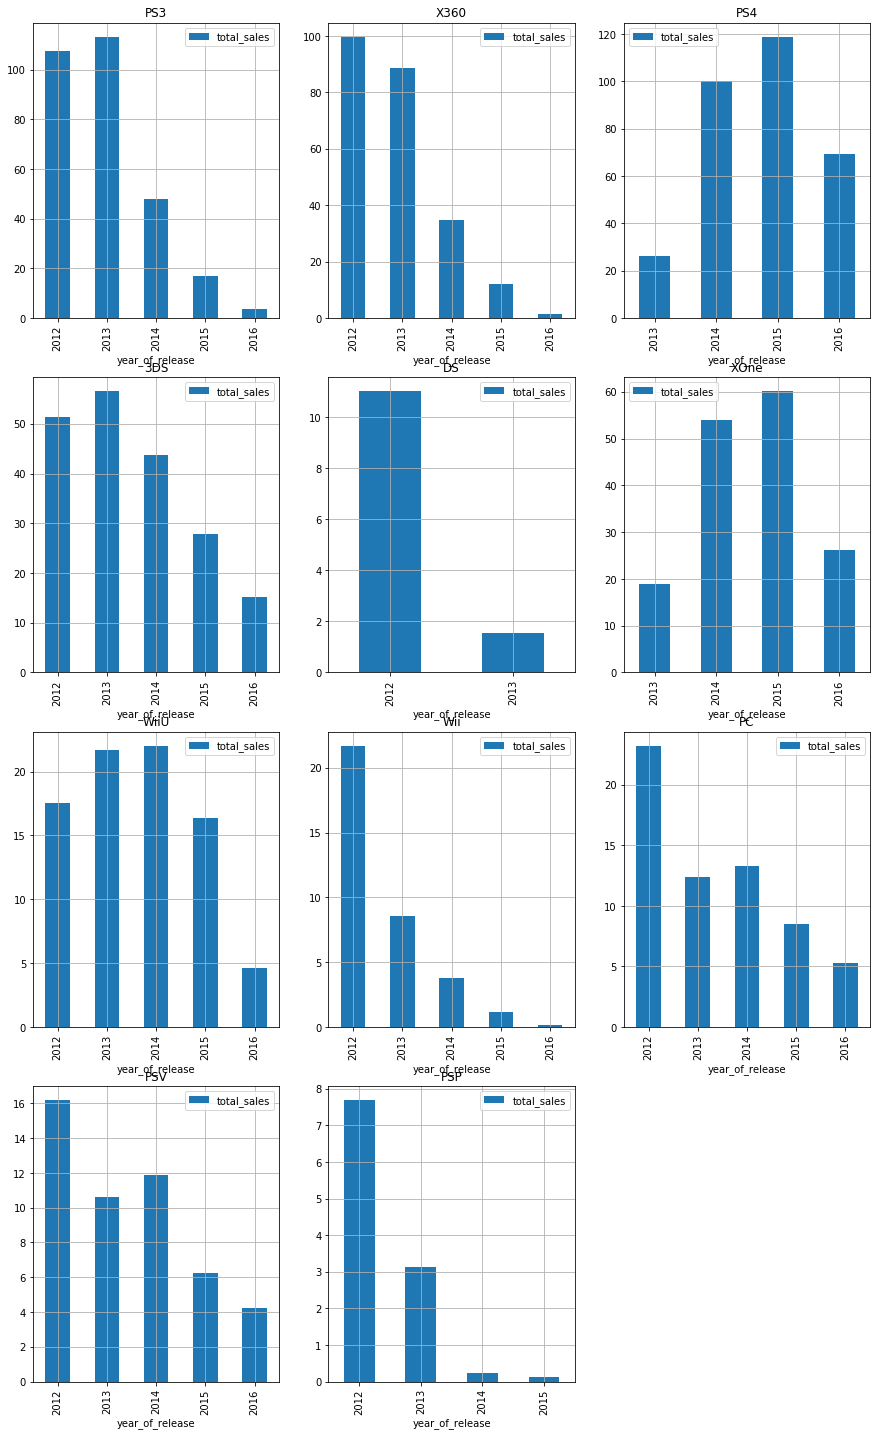

In [14]:
#посмотрим динамику продаж для актуальных платформ в актуальном периоде
plt.subplots(figsize=(15,25))
position = 1
for element in df_actual['platform'].unique():
    df_actual.query('platform == @element').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, ax=plt.subplot(4,3,position)).set_title(element)
    position += 1
plt.show()

Поскольку актуальный период я принял равным пяти годам, то теперь нас интересут данные по играм, выпущенным начиная с 2012-го года. В актуальном периоде мы имеем дело с одиннадцатью платформами: часть из них здесь лишь начинают свой жизненный цикл (PS4, XOne, 3DS, WiiU), а часть - уже доживают свой век (Wii, PS3, X360, DS и PSP). В актуальном периоде росли продажи таких платформ как: X360, PS3, PS4, XOne, WiiU, PSV и PC. Лучшие же суммарные продажи по итогам периода (они же - прибыльные платформы) продемонстрировали PS4, XOne и 3DS.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


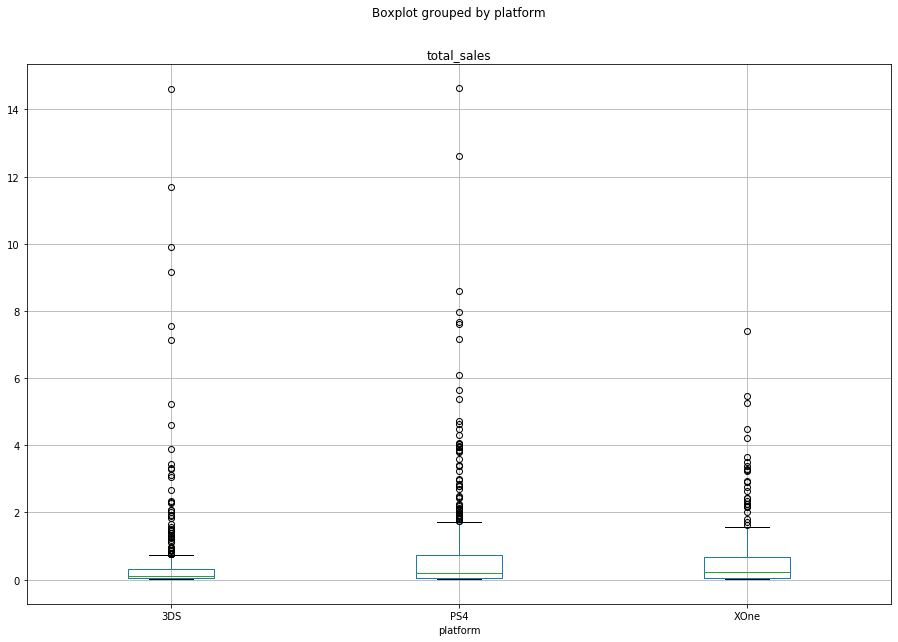

In [15]:
#построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам
actual_platforms = ['PS4', '3DS', 'XOne']
df_actual.query('platform in @actual_platforms').boxplot(column='total_sales', by='platform', figsize=(15, 10))

Построив график «ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам, я заметил, что для платформы 3DS вцелом невелика разница в продажах (сам ящик довольно маленький), однако присутствует значительная доля выбросов - игр с очень выдающимися продажами. Что касается PS4 и XOne, то у них картины похожие между собой: продажи игр отличаются чуть больше, чем у 3DS, и "ящики с усами" находятся на примерно одном уровне. Отличие лишь в том, что на PS4 больше выбросов - игр с выдающимися продажами.

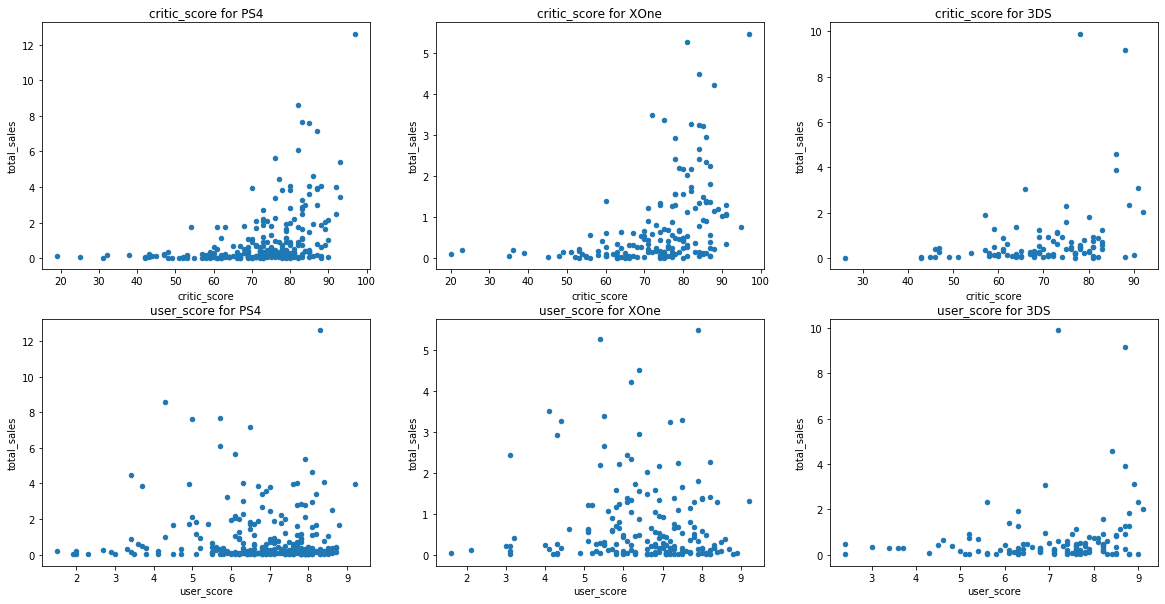

In [16]:
#построим диаграмму рассеяния влияния отзывов пользователей и критиков на продажи трех популярных платформ
position = 231
plt.subplots(figsize=(20,10))
for score in ['critic_score', 'user_score']:
    for element in ['PS4', 'XOne', '3DS']:
        df_actual.query('platform == @element').plot(kind='scatter', x=score, y='total_sales', ax=plt.subplot(position)).set_title(score +' for '+ element)
        position += 1

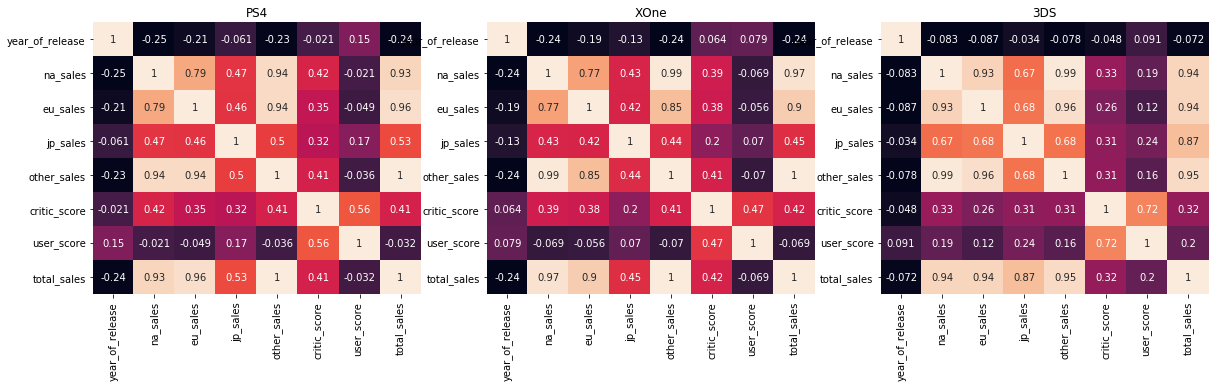

In [17]:
#построим матрицы корреляции для трех популярных платформ
position = 131
plt.subplots(figsize=(20,5))
for element in ['PS4', 'XOne', '3DS']:
    sns.heatmap(df_actual.query('platform == @element').corr(), annot=True, ax=plt.subplot(position), cbar=False).set_title(element)
    position += 1

Взглянув на диаграммы рассеяния продаж и отзывов критиков и пользователей, можно сказать, что для всех трех платформ актуально правило: хорошо продаются игры с высокими оценками критиков. Это подтверждают данные тепловой карты матрицы корреляции: коэффициент корреляции в этих случаях находится в диапазоне 0.32-0.42. Что же касается влияния отзывов пользователей на продажи игр, то на PS4 и XOne есть несколько игр, продавшихся довольно хорошо, несмотря на нелюбовь пользователей. Это также подтверждается матрицей корреляции: коэффициент корреляции практически равен нулю в обоих случаях. Наконец, ситуация у 3DS более ожидаемая: лучше продаются игры с высокими пользовательскими оценками. В данном случае коэффициент кореляции низок и равен 0.2.

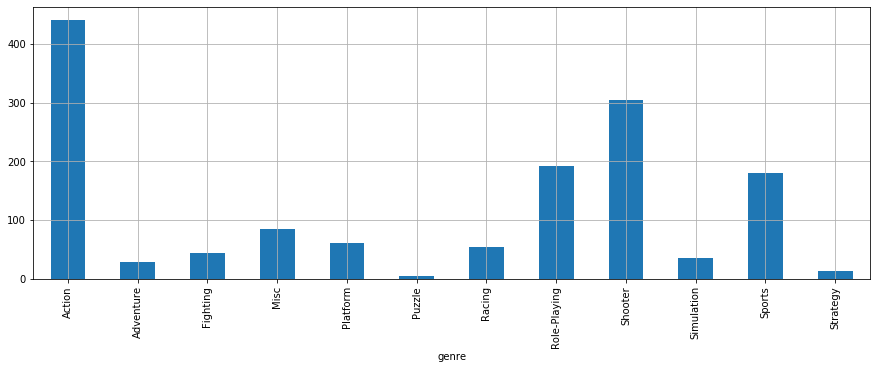

In [18]:
#посмотрим на общее распределение игр по жанрам
plt.subplots(figsize=(15,5))
df_actual.groupby('genre')['total_sales'].sum().plot(kind='bar', grid=True, ax=plt.subplot(111))

Посмотрев на общее распределение игр по жанрам, можно скзать, что самыми популярными жанрами являются action, shooter, role-playing и sport, при этом лидер обгоняет конкурентов в 1.5-2 раза. Самыми низкими продажами обладают жанры adventure, puzzle и strategy (они меньше лидера в 10-15 раз).

## Составление портрета пользователя каждого региона

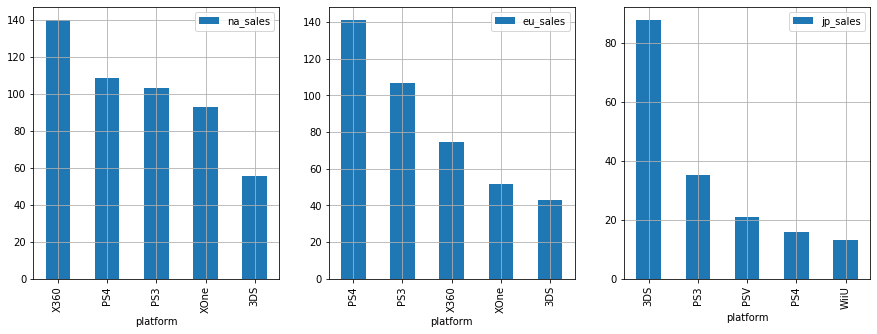

In [19]:
#посмотрим топ-5 самых популярных платформ по трем регионам
position = 131
plt.subplots(figsize=(15,5))
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    df_actual.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot(kind='bar', grid=True, ax=plt.subplot(position))
    position += 1

Рассмотрев топ-5 самых популярных платформ по трем регионам, можно сказать, что в Северной Америке наиболее популярны X360, PS4 и PS3, при этом Xbox опережает Playstation на 20%. В Европе ситуация отличается: там приоритет отдан продукции компании Sony, и лидирует PS4, опережающая конкурента - PS3 - на 20%. Тройку замыкает старое поколение консоли от Microsoft - X360. Наконец, в Японии, как обычно, своя атмосфера и в топ-5 вышли только платформы японского производства: лидирует 3DS с большим отрывом (60%), затем - PS3, PSV, PS4 и WiiU.

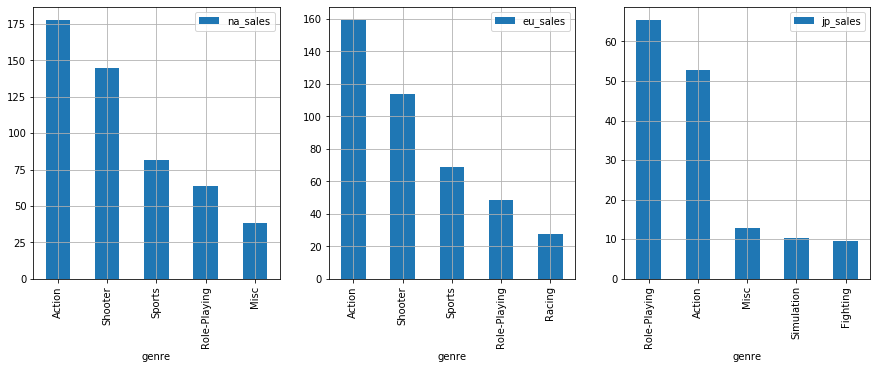

In [20]:
#посмотрим топ-5 самых популярных жанров по трем регионам
position = 131
plt.subplots(figsize=(15,5))
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    df_actual.pivot_table(index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot(kind='bar', grid=True, ax=plt.subplot(position))
    position += 1

Далее я рассмотрел топ-5 самых популярных жанров по трем регионам, и могу сказать, что в Северной Америке и Европе вкусы игроков совпадают и в топе места распределились одинаково (action, shooter, sports, role-playing), за исключением последних мест: misc - в Северной Америке и racing - в Европе. В Японии же топ выглядит несколько иначе: role-playing, action, misc, simulation и fighting. В Японии не любят шутеры, но с большим удовольствием играют в ролевые игры.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


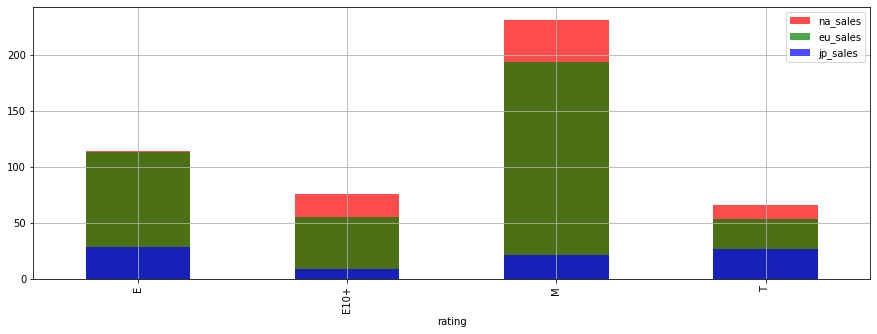

In [21]:
#посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе
plt.subplots(figsize=(15,5))
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    if region == 'na_sales':
        colour = 'r'
    elif region == 'eu_sales':
        colour = 'g'
    else:
        colour = 'b'
    df_actual.pivot_table(index='rating', values=region, aggfunc='sum').plot(kind='bar', grid=True, ax=plt.subplot(111), color=colour, alpha=0.7)
plt.show()

Что же касается влияния рейтинга ESRB на продажи в отдельном регионе, то в Северной Америке и Европе лучше всего продаются игры с рейтингом M и Е. В Японии места распределились по-другому: E, T и М.

## Проверка гипотез

In [22]:
#избавимся от пропусков в столбце с пользовательским рейтингом
df_cleansed = df_actual.copy()
df_cleansed.dropna(subset = ['user_score'], inplace = True)

Перейдя к формулированию и проверке гипотез, я избавился от пропусков в столбце user_score, так как t-тест чувствителен к пропускам.

In [23]:
#проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
alpha = .05
results = st.ttest_ind(df_cleansed.query('platform == "XOne"')['user_score'], df_cleansed.query('platform == "PC"')['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Чтобы ответить на первый из главных вопросов проекта - одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC - я выдвинул нулевую гипотезу о том, что средние оценки обеих платформ равны, и альтернативную - о том, что они, соответственно, не равны. Далее необходимо было определиться с критерием проверки выдвинутой гипотезы. Поскольку у нас большое количество одинаковых значений в столбце с оценками пользователей (критерий Манна-Уитни неприменим) и неизвестна дисперсия генеральной совокупности (z-критерий Фишера неприменим), я решил воспользоваться t-критерием Стьюдента. И так как мы выдвинули гипотезу о равенстве двух совокупностей, я применил метод scipy.stats.ttest_ind(), задав пороговое значение уровня занчимости равное 5%.

В итоге, уровень значимости оказался равным 55% - больше 5%, что означает, что отвергнуть нулевую гипотезу не получилось, следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

In [24]:
#проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные
alpha = .05
results = st.ttest_ind(df_cleansed.query('genre == "Action"')['user_score'], df_cleansed.query('genre == "Sports"')['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Наконец, чтобы ответить на второй главный вопрос проекта - различаются ли средние пользовательские рейтинги жанров Action и Sports - я выдвинул нулевую гипотезу о том, что оценки в обоих случаях равны, и альтернативную - о том, что они, соответственно, не равны. Как и прежде, я решил воспользоваться t-критерием Стьюдента (по тем же причинам). И так как мы выдвинули гипотезу о равенстве двух совокупностей, я снова применил метод scipy.stats.ttest_ind(), задав пороговое значение уровня значимости равное 5%.

В итоге, уровень значимости оказался значительно ниже 5%, а это значит, что нулевая гипотеза не подтвердилась, следовательно, средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

Подводя итоги проекта, можно сказать, что начиная с 1994-го года игровая индустрия начала стремительно расти вплоть до своего максимума в 2008-2009 годах, когда случившийся мировой финансовый кризис привел к снижению активности игровых разработчиков и издателей. В ходе проекта я рассчитал, что жизненный цикл игровой платформы равен приблизительно восьми годам, но для планирования работы интернет-магазина на 2017-й год актуальный период начинается в 2012-м - уже после стабилизации количества выпускаемых индустрией игр, что оказалось удобно для анализа, ведь картина продаж не была испорчена "внешними факторами" и является наиболее релевантной.

В актуальном периоде существовали 11 платформ, но не все из них показывали отличные результаты продаж: часть уже отживала свой век. Поэтому необходимо было выбрать те, что к 2017-му году еще не исчерпали свой ресурс, и ими оказались: PS4, XOne и 3DS. Вцелом, PS4 и Xbox добились лучших результатов, но у 3DS есть с десяток игр с выдающимися продажами.

Рассмотрев влияние оценок критиков и пользователей на продажи, можно сказать, что на всех трех платформах лучше продаются игры, рекомендованные критиками, а на 3DS - еще и пользователями, в то время как между оценками пользователей и продажами игр для PS4 и XOne практически нулевая корреляция.

Взглянув на общее распределение игр по жанрам, можно скзать, что самыми популярными жанрами являются action, shooter и sport, при этом лидер обгоняет конкурентов в 1.5-2 раза. Самыми низкими продажами обладают жанры adventure, puzzle и strategy (они меньше лидера в 10-15 раз).

Что касается распределения самых популярных платформ по регионам, то в Северной Америке это: X360, PS4, PS3, XOne и 3DS; в Европе - PS4, PS3, X360, XOne и 3DS; а в Японии - 3DS, PS3, PSV, PS4 и WiiU. Далее я рассмотрел топ-5 самых популярных жанров по трем регионам, и могу сказать, что в Северной Америке и Европе вкусы игроков на 80% совпадают и в топе места распределились одинаково: action, shooter, sports, role-playing и misc - в Северной Америке и racing - в Европе. В Японии же топ выглядит несколько иначе: role-playing, action, misc, simulation и fighting. Что же касается влияния рейтинга ESRB на продажи в отдельном регионе, то в Северной Америке и Европе лучше всего продаются игры с рейтингом M и Е. В Японии места распределились по-другому: E, T и М.

Наконец, в проекте были выдвинуты две гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные". Выдвинув соответствующие нулевые гипотезы и воспользовавшись t-критерием Стьюдента, я пришел к выводу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, а средние пользовательские рейтинги жанров Action и Sports различаются.